<a href="https://colab.research.google.com/github/Hydenx2004/EX-AI-practice/blob/main/Experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
model = RandomForestClassifier(n_estimators=100)

In [8]:
model.fit(X,y)

RandomForestClassifier()

In [18]:
imp_features = model.feature_importances_

In [19]:
imp_features = pd.DataFrame(imp_features,columns=['Feature Importance'],index=X.columns)

In [20]:
print(imp_features)

                          Feature Importance
Pregnancies                         0.081407
Glucose                             0.254436
BloodPressure                       0.089149
SkinThickness                       0.067742
Insulin                             0.077114
BMI                                 0.167435
DiabetesPedigreeFunction            0.119609
Age                                 0.143106


In [25]:
import matplotlib.pyplot as plt

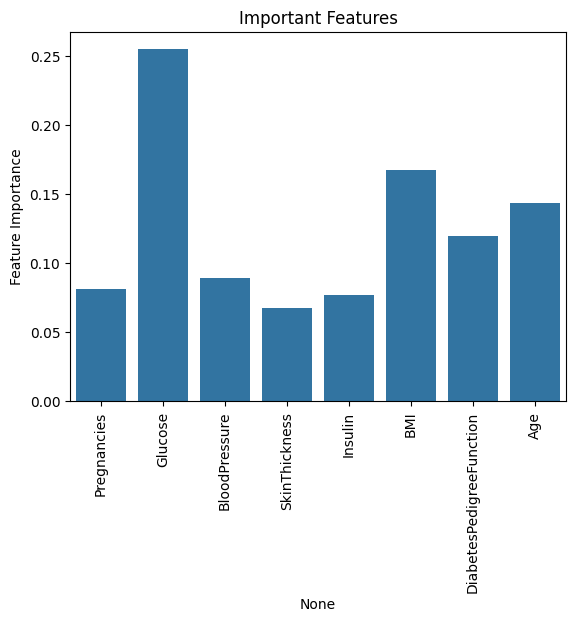

In [28]:
sns.barplot(x=imp_features.index,y=imp_features['Feature Importance'])
plt.title("Important Features")
plt.xticks(rotation=90)
plt.show()

In [45]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model =  KNeighborsClassifier(5)

In [47]:
model.fit(X,y)

KNeighborsClassifier()

In [48]:
results = permutation_importance(model,X,y)

In [50]:
print(results.importances_mean)

[-0.00182292  0.14973958  0.02083333  0.01588542  0.06380208  0.00911458
  0.          0.040625  ]


In [53]:
for i,v in enumerate(results.importances_mean):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00182
Feature: 1, Score: 0.14974
Feature: 2, Score: 0.02083
Feature: 3, Score: 0.01589
Feature: 4, Score: 0.06380
Feature: 5, Score: 0.00911
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04062


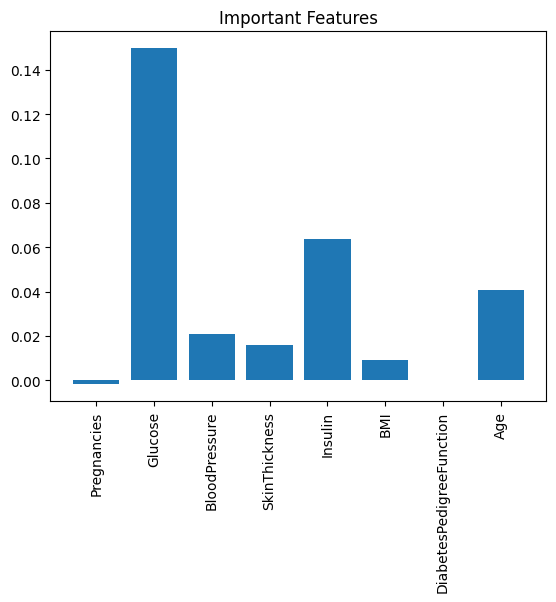

In [57]:
plt.bar(x=X.columns,height=results.importances_mean)
plt.title("Important Features")
plt.xticks(rotation=90)
plt.show()

In [114]:
from sklearn.datasets import load_breast_cancer

In [115]:
data = load_breast_cancer()

In [116]:
df = pd.concat([pd.DataFrame(data.data,columns=data.feature_names),pd.DataFrame(data.target,columns=['target'])],axis=1)

In [117]:
X = df.drop('target', axis=1)
y = df['target']

In [118]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [119]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [120]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [121]:
from tensorflow.keras.layers import Dense

In [122]:
model = Sequential([
    Dense(16,activation='relu', input_shape=(X.shape[1],)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
model.fit(X,y,epochs=10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8958 - loss: 0.6176
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9107 - loss: 0.2881 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - loss: 0.2405 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9402 - loss: 0.2165 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9246 - loss: 0.2252 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9411 - loss: 0.1746 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9122 - loss: 0.3180 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8909 - loss: 0.4339 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9313 - loss: 0.1740 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2222 


In [125]:
def sensitivity_anal(feature_idx):
  original_val = X.iloc[0, feature_idx]
  predictions = []
  for change in np.linspace(-0.5, 0.5, 11):
    X.iloc[0, feature_idx] = original_val + change
    prediction = model.predict(X.iloc[[0]])[0,0]
    predictions.append(prediction)
  return predictions

In [126]:
predictions = sensitivity_anal(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [127]:
for i, predic in enumerate(predictions):
    print(f"{i+1} change makes {predic} prediction.")

1 change makes 3.0693742244522888e-18 prediction.
2 change makes 3.151309152462657e-18 prediction.
3 change makes 3.235851146968639e-18 prediction.
4 change makes 3.3223568682488223e-18 prediction.
5 change makes 3.411279404483732e-18 prediction.
6 change makes 3.502635092490467e-18 prediction.
7 change makes 3.596465084504501e-18 prediction.
8 change makes 3.6927240923872965e-18 prediction.
9 change makes 3.791588305609328e-18 prediction.
10 change makes 3.892891460867472e-18 prediction.
11 change makes 3.997206380735922e-18 prediction.


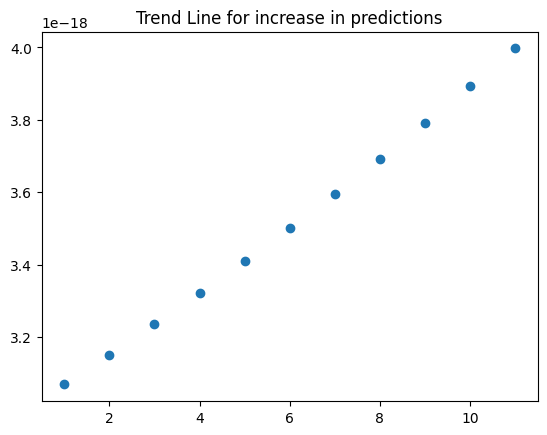

In [128]:
plt.scatter([1,2,3,4,5,6,7,8,9,10,11],sorted(predictions))
plt.title("Trend Line for increase in predictions")
plt.show()